### Import Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn import cross_validation as cv

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Load Data

In [2]:
df = pd.read_excel('p1-customers.xlsx')
df = df.join(pd.get_dummies(df['Customer_Segment']))

### Data Exploration

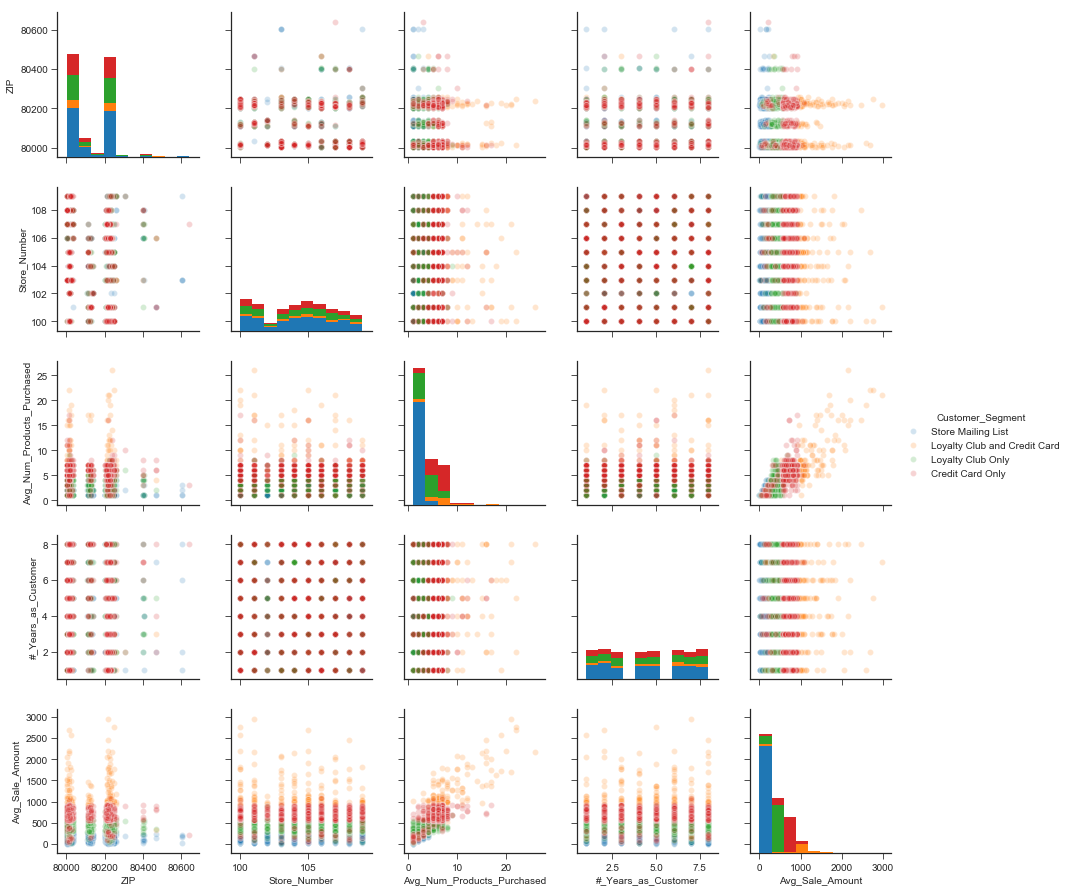

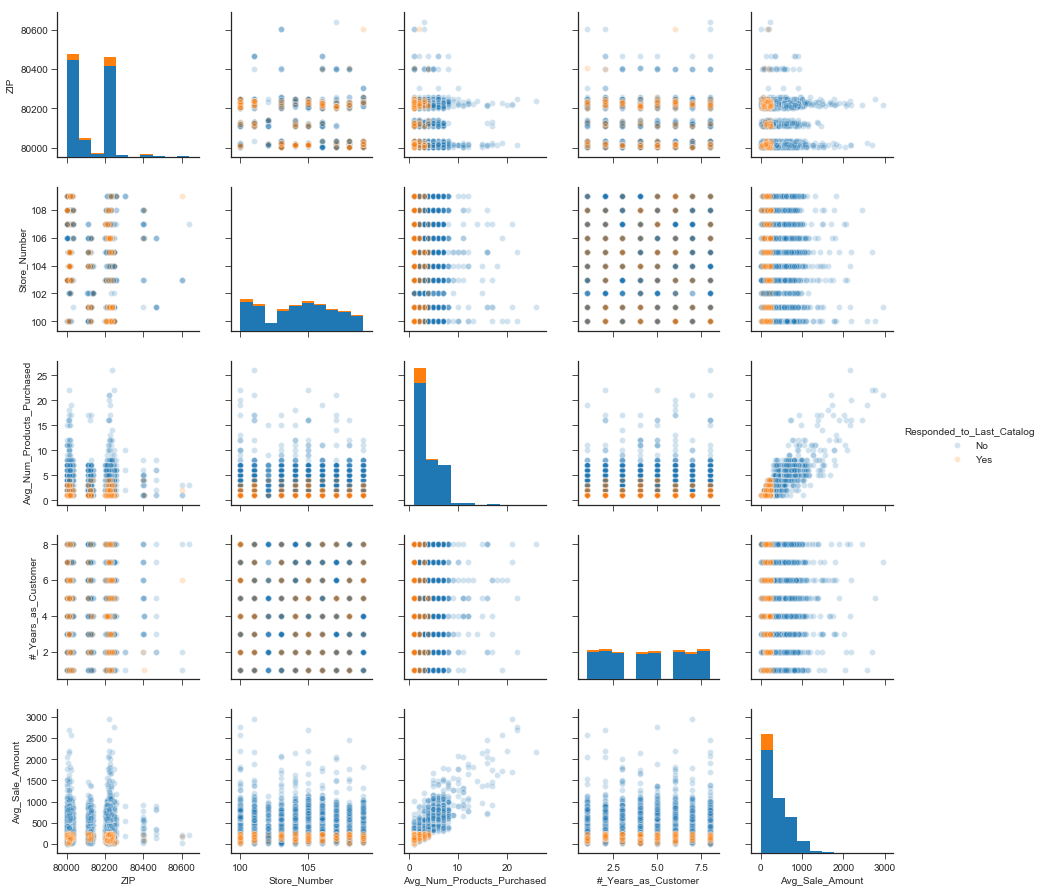

In [81]:
sns.pairplot(df[['Customer_Segment', 'City', 'ZIP', 
                 'Store_Number', 
                 'Responded_to_Last_Catalog', 'Avg_Num_Products_Purchased',
                 '#_Years_as_Customer', 'Avg_Sale_Amount']], 
             hue='Customer_Segment', plot_kws={'alpha': 0.2})
sns.pairplot(df[['Customer_Segment', 'City', 'ZIP', 
                 'Store_Number', 
                 'Responded_to_Last_Catalog', 'Avg_Num_Products_Purchased',
                 '#_Years_as_Customer', 'Avg_Sale_Amount']], 
             hue='Responded_to_Last_Catalog', plot_kws={'alpha': 0.2})

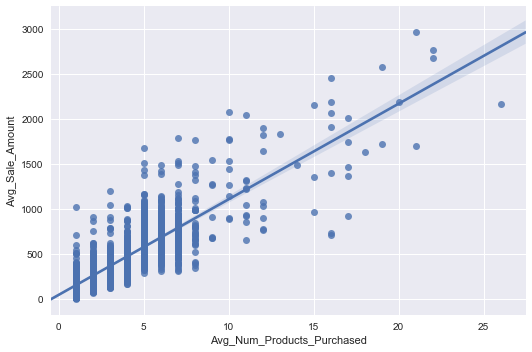

In [3]:
sns.lmplot(data=df, x='Avg_Num_Products_Purchased', y='Avg_Sale_Amount', aspect=1.5)

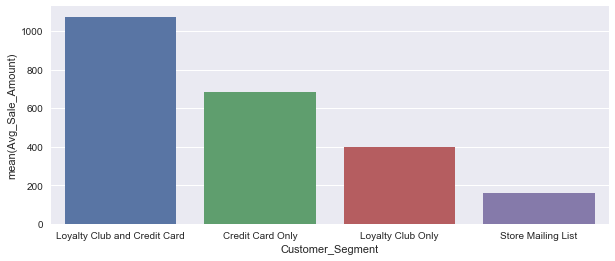

In [4]:
plt.figure(figsize=(10,4))
sns.barplot(data=df, x='Customer_Segment', y='Avg_Sale_Amount', order=['Loyalty Club and Credit Card',
                                                                       'Credit Card Only',
                                                                       'Loyalty Club Only',
                                                                       'Store Mailing List'],
           estimator=np.mean, ci=None)

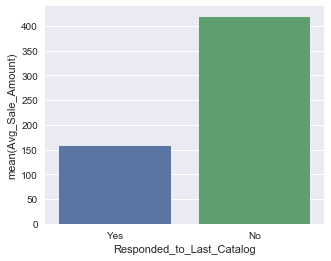

In [5]:
plt.figure(figsize=(5,4))
sns.barplot(data=df, x='Responded_to_Last_Catalog', y='Avg_Sale_Amount', ci=None, order=['Yes','No'])

(2, 3335)

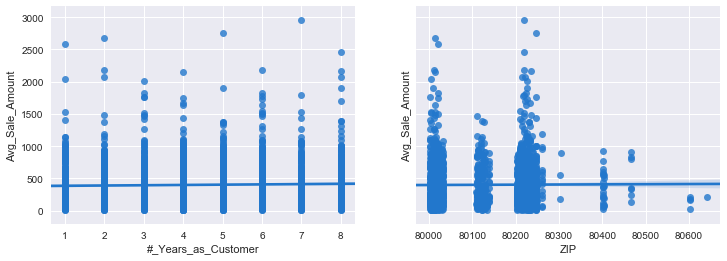

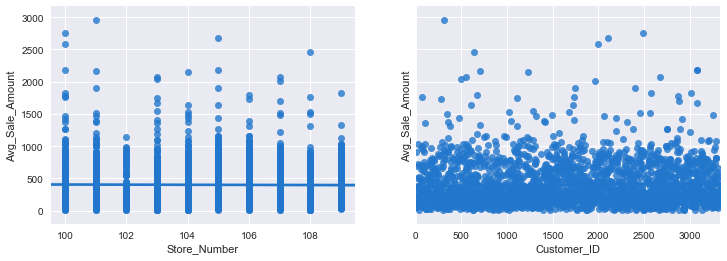

In [6]:
fig1, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(12,4))
fig2, (ax3, ax4) = plt.subplots(ncols=2, sharey=True, figsize=(12,4))
sns.regplot(data=df, x='#_Years_as_Customer', y='Avg_Sale_Amount', ax=ax1, color='#2277cc')
sns.regplot(data=df, x='ZIP', y='Avg_Sale_Amount', ax=ax2, color='#2277cc')
sns.regplot(data=df, x='Store_Number', y='Avg_Sale_Amount', ax=ax3, color='#2277cc')
sns.regplot(data=df, x='Customer_ID', y='Avg_Sale_Amount', ax=ax4, color='#2277cc')
ax4.set_xlim(left=min(df['Customer_ID'].values), right=max(df['Customer_ID'].values))

### Create Dummy Variables for Customer Segment

In [7]:
df = pd.read_excel('p1-customers.xlsx')
df = df.join(pd.get_dummies(df['Customer_Segment']))
# Replace Customer_Segment with mapped number
# df['Customer_Segment'] = df['Customer_Segment'].apply(lambda x: customer_segment_map.keys()[customer_segment_map.values().index(x)])
df['Responded_to_Last_Catalog'] = df['Responded_to_Last_Catalog'].apply(lambda x: 1 if x == 'Yes' else 0)
df.head()

,Name,Customer_Segment,Customer_ID,Address,City,State,ZIP,Avg_Sale_Amount,Store_Number,Responded_to_Last_Catalog,Avg_Num_Products_Purchased,#_Years_as_Customer,Credit Card Only,Loyalty Club Only,Loyalty Club and Credit Card,Store Mailing List
0,Pamela Wright,Store Mailing List,2,376 S Jasmine St,Denver,CO,80224,227.90,100,0,1,6,0,0,0,1
1,Danell Valdez,Store Mailing List,7,12066 E Lake Cir,Greenwood Village,CO,80111,55.00,105,1,1,6,0,0,0,1
2,Jessica Rinehart,Store Mailing List,8,7225 S Gaylord St,Centennial,CO,80122,212.57,101,0,1,3,0,0,0,1
3,Nancy Clark,Store Mailing List,9,4497 Cornish Way,Denver,CO,80239,195.31,105,1,1,6,0,0,0,1
4,Andrea Brun,Store Mailing List,10,2316 E 5th Ave,Denver,CO,80206,110.55,100,1,1,2,0,0,0,1


In [8]:
df[['Customer_Segment', 
           'Credit Card Only',
          'Loyalty Club Only',
          'Loyalty Club and Credit Card',
          'Store Mailing List']].drop_duplicates()

,Customer_Segment,Credit Card Only,Loyalty Club Only,Loyalty Club and Credit Card,Store Mailing List
0,Store Mailing List,0,0,0,1
1108,Loyalty Club and Credit Card,0,0,1,0
1302,Loyalty Club Only,0,1,0,0
1881,Credit Card Only,1,0,0,0


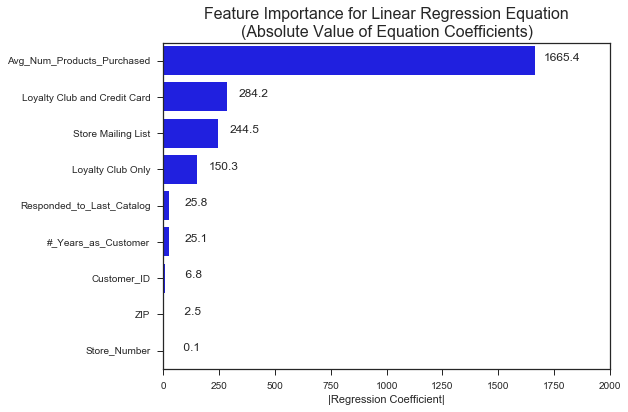

In [9]:
feature_names = ['ZIP', 'Customer_ID', 'Store_Number', '#_Years_as_Customer',
                 'Responded_to_Last_Catalog',
                 'Loyalty Club Only',
                 'Loyalty Club and Credit Card',
                 'Store Mailing List',
                 'Avg_Num_Products_Purchased']
features = df[feature_names]
labels = df['Avg_Sale_Amount']

# Scale features
from sklearn.preprocessing import MinMaxScaler

scaled_features = MinMaxScaler().fit(features).transform(features)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_features, labels, test_size=0.3, random_state=0)
reg = LinearRegression()
reg.fit(X_train, y_train)

# Make Plot
sns.set_style('ticks')

plt.figure(figsize=(8,6))
ax = sns.barplot(y=feature_names, 
                 x=abs(reg.coef_), 
                 color='b', 
                 order=[feature_names[i] for i in list(np.argsort(np.abs(reg.coef_)))[::-1]])
plt.xlabel('|Regression Coefficient|')
plt.title('Feature Importance for Linear Regression Equation\n(Absolute Value of Equation Coefficients)', 
          fontdict={'fontsize': 16})
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    ax.text(width + 120,
            p.get_y()+height/2.,
            '{:4.1f}'.format(p.get_width()),
            ha='center',
            size='large')
plt.xlim([0,2000])
plt.show()

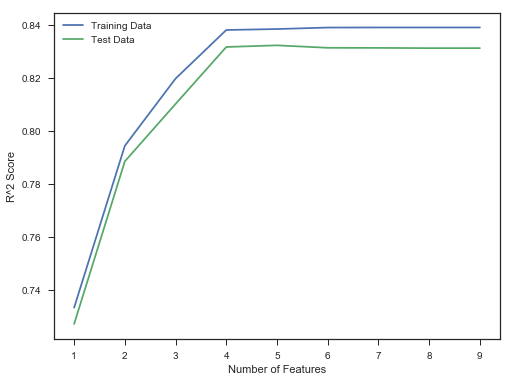

In [10]:
# Calculate r2 while removing features
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

feature_names = ['ZIP', 'Customer_ID', 'Store_Number', '#_Years_as_Customer',
                 'Responded_to_Last_Catalog',
                 'Loyalty Club Only',
                 'Loyalty Club and Credit Card',
                 'Store Mailing List',
                 'Avg_Num_Products_Purchased']
features = df[feature_names]
labels = df['Avg_Sale_Amount']

scaled_features = MinMaxScaler().fit(features).transform(features)
X_train, X_test, y_train, y_test = train_test_split(scaled_features, labels, test_size=0.3, random_state=0)
reg = LinearRegression()
reg.fit(X_train, y_train)
feature_names_by_importance = [feature_names[i] for i in list(np.argsort(np.abs(reg.coef_)))[::-1]]

num_features = len(feature_names_by_importance)
r2_train = []
r2_test = []
for i in range(0,num_features):
    cur_features = feature_names_by_importance[:i+1]
    X_train, X_test, y_train, y_test = train_test_split(df[cur_features], labels, test_size=0.3, random_state=0)
    reg = LinearRegression()
    reg.fit(X_train, y_train)
    r2_train.append(r2_score(y_train, reg.predict(X_train)))
    r2_test.append(r2_score(y_test, reg.predict(X_test)))
    

# Make Plot
plt.figure(figsize=(8,6))
plt.plot(range(1,len(r2_train)+1), r2_train)
plt.plot(range(1,len(r2_train)+1), r2_test)
plt.xlabel('Number of Features')
plt.ylabel('R^2 Score')
plt.legend(['Training Data', 'Test Data'])
plt.show()

In [11]:
feature_names_by_importance[:4]

['Avg_Num_Products_Purchased',
 'Loyalty Club and Credit Card',
 'Store Mailing List',
 'Loyalty Club Only']

In [13]:
# Generate Equation
num_features = 4
reg = LinearRegression()
reg.fit(df[feature_names_by_importance[:num_features]], df['Avg_Sale_Amount'])

equation_str = ''
equation_str += "{:0.4f}".format(reg.intercept_)
for i in range(len(feature_names_by_importance[:num_features])):
    if reg.coef_[i] < 0:
        eqn_sign = ' - ('
    else:
        eqn_sign = ' + ('
    equation_str += (eqn_sign + "{:0.4f}".format(abs(reg.coef_[i])) + ' x ' + feature_names_by_importance[i] + ')')
print(equation_str)
print()
print('R^2 Score (All Data): {:0.4f}'.format(r2_score(df['Avg_Sale_Amount'], reg.predict(df[feature_names_by_importance[:num_features]]))))

303.4635 + (66.9762 x Avg_Num_Products_Purchased) + (281.8388 x Loyalty Club and Credit Card) - (245.4177 x Store Mailing List) - (149.3557 x Loyalty Club Only)
()
R^2 Score (All Data): 0.8369


### Apply Regression Fitting to Mailing List Data

In [14]:
df_mailing_list = pd.read_excel('p1-mailinglist.xlsx')
df_mailing_list = df_mailing_list.join(pd.get_dummies(df_mailing_list['Customer_Segment']))

In [15]:
df_mailing_list['Predicted_Average_Sale_Amount'] = reg.predict(df_mailing_list[feature_names_by_importance[:num_features]])

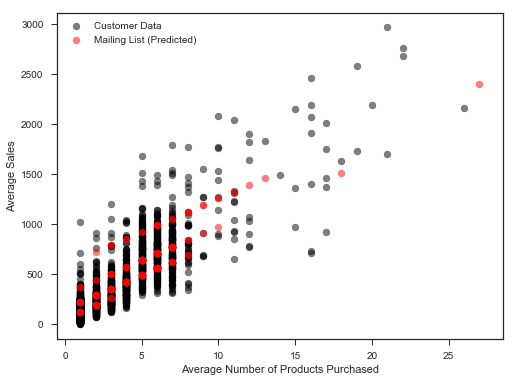

In [44]:
plt.figure(figsize=(8,6))
plt.scatter(df['Avg_Num_Products_Purchased'], df['Avg_Sale_Amount'], color='black', alpha=0.5)
plt.scatter(df_mailing_list['Avg_Num_Products_Purchased'], df_mailing_list['Predicted_Average_Sale_Amount'], color='red', alpha=0.5)
plt.xlabel('Average Number of Products Purchased')
plt.ylabel('Average Sales')
plt.legend(['Customer Data', 'Mailing List (Predicted)'])

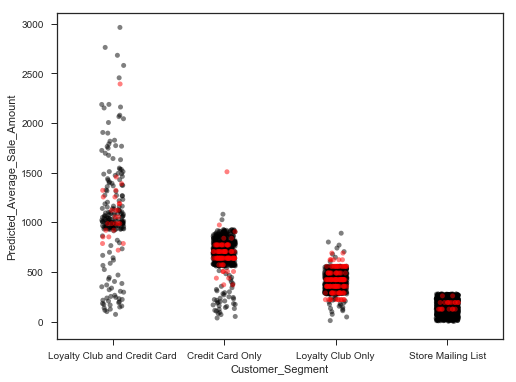

In [43]:
# fig1, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(12,4))
plt.figure(figsize=(8,6))
sns.stripplot(data=df, x='Customer_Segment', y='Avg_Sale_Amount', order=['Loyalty Club and Credit Card',
                                                                       'Credit Card Only',
                                                                       'Loyalty Club Only',
                                                                       'Store Mailing List'],
             jitter=True, color='k', alpha=0.5)
sns.stripplot(data=df_mailing_list, x='Customer_Segment', y='Predicted_Average_Sale_Amount', order=['Loyalty Club and Credit Card',
                                                                       'Credit Card Only',
                                                                       'Loyalty Club Only',
                                                                       'Store Mailing List'],
             jitter=True, color='r', alpha=0.5)

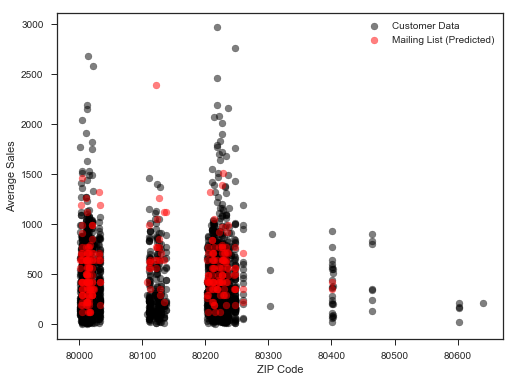

In [45]:
plt.figure(figsize=(8,6))
plt.scatter(df['ZIP'], df['Avg_Sale_Amount'], color='black', alpha=0.5)
plt.scatter(df_mailing_list['ZIP'], df_mailing_list['Predicted_Average_Sale_Amount'], color='red', alpha=0.5)
plt.xlabel('ZIP Code')
plt.ylabel('Average Sales')
plt.legend(['Customer Data', 'Mailing List (Predicted)'])

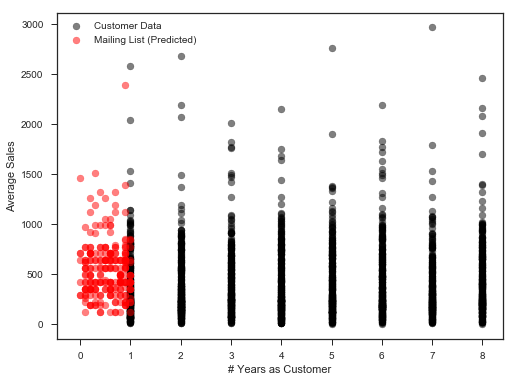

In [46]:
plt.figure(figsize=(8,6))
plt.scatter(df['#_Years_as_Customer'], df['Avg_Sale_Amount'], color='black', alpha=0.5)
plt.scatter(df_mailing_list['#_Years_as_Customer'], df_mailing_list['Predicted_Average_Sale_Amount'], color='red', alpha=0.5)
plt.xlabel('# Years as Customer')
plt.ylabel('Average Sales')
plt.legend(['Customer Data', 'Mailing List (Predicted)'])

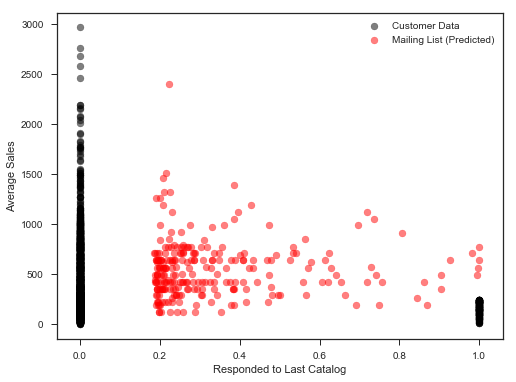

In [47]:
plt.figure(figsize=(8,6))
plt.scatter(df['Responded_to_Last_Catalog'], df['Avg_Sale_Amount'], color='black', alpha=0.5)
plt.scatter(df_mailing_list['Score_Yes'], df_mailing_list['Predicted_Average_Sale_Amount'], color='red', alpha=0.5)
plt.xlabel('Responded to Last Catalog')
plt.ylabel('Average Sales')
plt.legend(['Customer Data', 'Mailing List (Predicted)'])

In [54]:
df_mailing_list['Predicted_Revenue'] = df_mailing_list['Predicted_Average_Sale_Amount']*df_mailing_list['Score_Yes']
df_mailing_list['Predicted_Profit'] = df_mailing_list['Predicted_Revenue']*0.5 - 6.50

In [58]:
df_mailing_list[['Customer_ID', 'Name', 'Customer_Segment', 
                 'Predicted_Average_Sale_Amount', 'Score_Yes',
                 'Predicted_Revenue', 'Predicted_Profit']].head(5)

,Customer_ID,Name,Customer_Segment,Predicted_Average_Sale_Amount,Score_Yes,Predicted_Revenue,Predicted_Profit
0,2213,A Giametti,Loyalty Club Only,355.036364,0.305036,108.298804,47.649402
1,2785,Abby Pierson,Loyalty Club and Credit Card,987.159466,0.472725,466.654501,226.827251
2,2931,Adele Hallman,Loyalty Club Only,622.941184,0.578882,360.609345,173.804672
3,2231,Alejandra Baird,Loyalty Club Only,288.060159,0.305138,87.898046,37.449023
4,2530,Alice Dewitt,Loyalty Club Only,422.012569,0.387706,163.616744,75.308372


In [59]:
print("Total Predicted Sales: ${:0.2f}".format(np.sum(df_mailing_list['Predicted_Average_Sale_Amount'])))
print("Total Predicted Revenue: ${:0.2f}".format(np.sum(df_mailing_list['Predicted_Revenue'])))
print("Total Predicted Profit: ${:0.2f}".format(np.sum(df_mailing_list['Predicted_Profit'])))

Total Predicted Sales: $138292.13
Total Predicted Revenue: $47224.87
Total Predicted Profit: $21987.44


In [61]:
print("Total Sales: ${:0.2f}".format(np.sum(df['Avg_Sale_Amount']*0.5-6.5)))

Total Sales: $459294.24


In [62]:
21987.44/459294.24

0.047872231099610564